In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Step1#Reponse
#on va creer une fonction qui prend comme arguments positionnels datedebut et datefin ,et un argment par defaut , une liste 
#qui contient tous les stock , C'est une fonction qui retourne les prix des stock specifiee sinon par defaut tous les stock 
#pendant la periode specifiee :
T=['MSFT','IBM','AAPL','FB','GOOG','NDX']
def ExtractDonnee(datedebut,datefin,Stock=T): 
    #Organisation de La dataframe 
    market_data=pd.read_json('market_data.json')
    L=list(market_data.columns)
    #On remarque que pour tous les enregistrements de tous les stocks :ont le meme id et le meme stock , donc on procede comme suit :
    market_data['id']=market_data[L[0]].apply(lambda x:x['_id'])
    market_data['Date']=market_data[L[0]].apply(lambda x:x['data']['Date'])
    for t in L:
        market_data[t]=market_data[t].apply(lambda x: x['data']['price'])
    #eT Voila LE RESultat , on obtient une dataframe bien organisee
    
    market_data.set_index('Date',inplace=True)
    datedebut=datedebut+'T00:00:00'
    datefin=datefin+'T00:00:00'
    N=market_data.copy()
    return N.loc[datedebut:datefin,Stock] 


In [21]:
market_data=pd.read_json('market_data.json')
L=list(market_data.columns)
#On remarque que pour tous les enregistrements de tous les stocks :ont le meme id et le meme stock , donc on procede comme suit :
market_data['id']=market_data[L[0]].apply(lambda x:x['_id'])
market_data['Date']=market_data[L[0]].apply(lambda x:x['data']['Date'])
for t in L:
        market_data[t]=market_data[t].apply(lambda x: x['data']['price'])
market_data

,MSFT,IBM,AAPL,FB,GOOG,NDX,id,Date
0,24.327055,146.358612,65.592659,38.230000,299.078979,2478.530029,0,2012-05-18T00:00:00
1,NaN,147.763336,69.414101,34.029999,305.908386,2545.429932,1,2012-05-21T00:00:00
2,24.734301,147.060989,68.881065,31.000000,299.278229,2539.199951,2,2012-05-22T00:00:00
3,24.194075,146.537994,70.561768,32.000000,303.592072,2547.080078,3,2012-05-23T00:00:00
4,24.160828,146.515564,69.913734,33.029999,300.702881,2531.350098,4,2012-05-24T00:00:00
...,...,...,...,...,...,...,...,...
1642,101.617836,108.498039,157.706192,133.240005,1023.010010,6342.970215,1642,2018-12-19T00:00:00
1643,92.248878,100.241623,143.924454,124.059998,976.219971,5899.350098,1643,2018-12-24T00:00:00
1644,99.158005,106.028572,153.059998,134.520004,1043.880005,6288.299805,1644,2018-12-27T00:00:00
1645,98.383781,105.329666,153.138428,133.199997,1037.079956,6285.270020,1645,2018-12-28T00:00:00


In [3]:
#Resultat step1:
#On appelle la fonction ExctractDonnee en specifiant les stock : 
J=ExtractDonnee('2017-01-01','2018-12-31',['GOOG','AAPL']).reset_index()
#step2:
#Premiere Partie 
#Pour gerer les Datamissing , je propose deux methode , celui de l'interpolation lineaire ou supprimer les donnees ;
#Methode 1 :Interpolation lineaire 
#Mais avant , Checkons s'il y a Missing data  dans notre base de donnee 
J.isnull().describe()

,Date,GOOG,AAPL
count,484,484,484
unique,1,1,2
top,False,False,False
freq,484,484,483


In [4]:
#On remarque que stock appl  a seulement 483 valeurs de false , donc y a surement une valeur True , ce qui signifie une valeur
#manquante pour le stock app .Pour gerer cela on va utiliser methode d'interpolation lineaire 
J=J.interpolate(method ='linear', limit_direction ='forward') 
#Verification
J.isnull().describe()

,Date,GOOG,AAPL
count,484,484,484
unique,1,1,1
top,False,False,False
freq,484,484,484


In [5]:
#Deuxieme Partie 
#Dans notre portefuille on detient 100 $ de GooG et 100$ de AAPL à la date precise dans l'enonce , donc on detient X1 de Google 
#et X2 de Y, determinons X1 et X2 :
X1=100/(J['GOOG'].iloc[0])
X2=100/(J['AAPL'].iloc[0])
X1,X2


(0.12720380356763814, 0.9058600030519698)

In [6]:
def handldatamissing(datedebut,datefin,stock=T):
    F=ExtractDonnee(datedebut,datefin,stock).reset_index()
    F=F.interpolate(method ='linear', limit_direction ='both')
    return F
handldatamissing('2017-01-01','2018-12-31')

,Date,MSFT,IBM,AAPL,FB,GOOG,NDX
0,2017-01-03T00:00:00,58.969059,143.492233,110.392334,116.860001,786.140015,4911.330078
1,2017-01-04T00:00:00,58.705212,145.268768,110.268791,118.690002,786.900024,4937.200195
2,2017-01-05T00:00:00,58.705212,144.788177,110.829552,120.669998,794.020020,4964.950195
3,2017-01-06T00:00:00,59.214054,145.500534,112.065109,123.410004,806.150024,5007.080078
4,2017-01-09T00:00:00,59.025597,143.886993,113.091560,124.900002,806.650024,5024.899902
...,...,...,...,...,...,...,...
479,2018-12-19T00:00:00,101.617836,108.498039,157.706192,133.240005,1023.010010,6342.970215
480,2018-12-24T00:00:00,92.248878,100.241623,143.924454,124.059998,976.219971,5899.350098
481,2018-12-27T00:00:00,99.158005,106.028572,153.059998,134.520004,1043.880005,6288.299805
482,2018-12-28T00:00:00,98.383781,105.329666,153.138428,133.199997,1037.079956,6285.270020


In [8]:
#notre investisment evolue tant quele prix evolue :
J['InvestGoog']=J['GOOG'].apply(lambda x: x*X1)
J['InvestaPPLE']=J['AAPL'].apply(lambda x: x*X2)
J

,Date,GOOG,AAPL,InvestGoog,InvestaPPLE
0,2017-01-03T00:00:00,786.140015,110.392334,100.000000,100.000000
1,2017-01-04T00:00:00,786.900024,110.268791,100.096676,99.888088
2,2017-01-05T00:00:00,794.020020,110.829552,101.002367,100.396058
3,2017-01-06T00:00:00,806.150024,112.065109,102.545349,101.515300
4,2017-01-09T00:00:00,806.650024,113.091560,102.608951,102.445121
...,...,...,...,...,...
479,2018-12-19T00:00:00,1023.010010,157.706192,130.130764,142.859732
480,2018-12-24T00:00:00,976.219971,143.924454,124.178893,130.375406
481,2018-12-27T00:00:00,1043.880005,153.059998,132.785507,138.650930
482,2018-12-28T00:00:00,1037.079956,153.138428,131.920515,138.721977


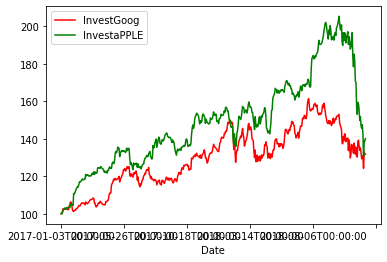

In [9]:
#Plot results in one graph
ax= plt.gca()
J.plot(kind='line',x='Date',y='InvestGoog',color='red',ax=ax)
J.plot(kind='line',x='Date',y='InvestaPPLE', color='green', ax=ax)
plt.show()

In [15]:
#D'UNE MaNIERE Generale , ON va definir une fonction qui prend comme argumen Z liste des investissement correspondant au stock specifie sin par defaut tous les stocks(mais il faut indiquer les investissemtnt correspondant ) 
def investindata(Z,datedebut,datefin,stock=T):
    F=handldatamissing(datedebut,datefin,stock)
    for s in Z:
        for i in range(len(stock)):
            X=s/(F[stock[i]].iloc[0])
            F['Invest '+str(stock[i])]=F[stock[i]].apply(lambda x: x*X)
    return F
C=investindata([100]*6,'2017-01-01','2018-12-31')
C

,Date,MSFT,IBM,AAPL,FB,GOOG,NDX,Invest MSFT,Invest IBM,Invest AAPL,Invest FB,Invest GOOG,Invest NDX
0,2017-01-03T00:00:00,58.969059,143.492233,110.392334,116.860001,786.140015,4911.330078,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2017-01-04T00:00:00,58.705212,145.268768,110.268791,118.690002,786.900024,4937.200195,99.552566,101.238071,99.888088,101.565978,100.096676,100.526744
2,2017-01-05T00:00:00,58.705212,144.788177,110.829552,120.669998,794.020020,4964.950195,99.552566,100.903146,100.396058,103.260309,101.002367,101.091764
3,2017-01-06T00:00:00,59.214054,145.500534,112.065109,123.410004,806.150024,5007.080078,100.415464,101.399588,101.515300,105.605000,102.545349,101.949574
4,2017-01-09T00:00:00,59.025597,143.886993,113.091560,124.900002,806.650024,5024.899902,100.095877,100.275109,102.445121,106.880028,102.608951,102.312405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2018-12-19T00:00:00,101.617836,108.498039,157.706192,133.240005,1023.010010,6342.970215,172.323991,75.612482,142.859732,114.016776,130.130764,129.149744
480,2018-12-24T00:00:00,92.248878,100.241623,143.924454,124.059998,976.219971,5899.350098,156.436070,69.858570,130.375406,106.161216,124.178893,120.117158
481,2018-12-27T00:00:00,99.158005,106.028572,153.059998,134.520004,1043.880005,6288.299805,168.152598,73.891506,138.650930,115.112103,132.785507,128.036595
482,2018-12-28T00:00:00,98.383781,105.329666,153.138428,133.199997,1037.079956,6285.270020,166.839667,73.404437,138.721977,113.982540,131.920515,127.974905


In [12]:
C=investindata([100]*6,'2017-01-01','2018-12-31')
C

,Date,MSFT,IBM,AAPL,FB,GOOG,NDX,Invest MSFT,Invest IBM,Invest AAPL,Invest FB,Invest GOOG,Invest NDX
0,2017-01-03T00:00:00,58.969059,143.492233,110.392334,116.860001,786.140015,4911.330078,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2017-01-04T00:00:00,58.705212,145.268768,110.268791,118.690002,786.900024,4937.200195,99.552566,101.238071,99.888088,101.565978,100.096676,100.526744
2,2017-01-05T00:00:00,58.705212,144.788177,110.829552,120.669998,794.020020,4964.950195,99.552566,100.903146,100.396058,103.260309,101.002367,101.091764
3,2017-01-06T00:00:00,59.214054,145.500534,112.065109,123.410004,806.150024,5007.080078,100.415464,101.399588,101.515300,105.605000,102.545349,101.949574
4,2017-01-09T00:00:00,59.025597,143.886993,113.091560,124.900002,806.650024,5024.899902,100.095877,100.275109,102.445121,106.880028,102.608951,102.312405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2018-12-19T00:00:00,101.617836,108.498039,157.706192,133.240005,1023.010010,6342.970215,172.323991,75.612482,142.859732,114.016776,130.130764,129.149744
480,2018-12-24T00:00:00,92.248878,100.241623,143.924454,124.059998,976.219971,5899.350098,156.436070,69.858570,130.375406,106.161216,124.178893,120.117158
481,2018-12-27T00:00:00,99.158005,106.028572,153.059998,134.520004,1043.880005,6288.299805,168.152598,73.891506,138.650930,115.112103,132.785507,128.036595
482,2018-12-28T00:00:00,98.383781,105.329666,153.138428,133.199997,1037.079956,6285.270020,166.839667,73.404437,138.721977,113.982540,131.920515,127.974905


In [10]:
#Calcul des rendements quotidiens :
J1=J[['InvestGoog','InvestaPPLE']]
Returns=J1.pct_change()[1:]
Returns['Date']=J['Date']
Returns

,InvestGoog,InvestaPPLE,Date
1,0.000967,-0.001119,2017-01-04T00:00:00
2,0.009048,0.005085,2017-01-05T00:00:00
3,0.015277,0.011148,2017-01-06T00:00:00
4,0.000620,0.009159,2017-01-09T00:00:00
5,-0.002306,0.001009,2017-01-10T00:00:00
...,...,...,...
479,-0.005541,-0.031192,2018-12-19T00:00:00
480,-0.045738,-0.087389,2018-12-24T00:00:00
481,0.069308,0.063475,2018-12-27T00:00:00
482,-0.006514,0.000512,2018-12-28T00:00:00


In [11]:
#Calcul moyenne et ecart type des rendements  quotidiens :Returns.mean()
Returns.mean()

InvestGoog     0.000677
InvestaPPLE    0.000818
dtype: float64

In [12]:
Returns.std()


InvestGoog     0.014560
InvestaPPLE    0.015458
dtype: float64

In [16]:
#annualize les rendement et std pr cet exple, 2 annee entre la date debut et fin de cet exple donc on va diviser sur 2 :
H=pd.DataFrame(Returns.mean())
annualiseReturns= H.apply(lambda x: x/2)
G=pd.DataFrame(Returns.std())
annualyisestd= G.apply(lambda x: x/2)
annualiseReturns

,0
InvestGoog,0.000338
InvestaPPLE,0.000409


In [17]:
#d'une maniere general definitions une fonction qui calcule les rendemen quotidien  et retourne mean et std, cette fonction 
#prend comme argument J , J est une dataFrame resultat de la fonction investindata:
def rendement(J,stock=T):
    M=[]
    for i in(stock):
        M.append('Invest'+str(i))
    J1=J[M]
    Returns=J1.pct_change()[1:]
    Returns['Date']=J['Date']
    return Returns


KeyError: "None of [Index(['InvestMSFT', 'InvestIBM', 'InvestAAPL', 'InvestFB', 'InvestGOOG',\n       'InvestNDX'],\n      dtype='object')] are in the [columns]"